Importing all required libraries

In [142]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

Mounts my google drive since i've loaded the dataset there

In [143]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Conducting basic analysis of the dataset

In [144]:
df=pd.read_csv("./drive/MyDrive/tips (data for regression problem).csv")
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [145]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Implementing one hot encoding of categorical data

In [147]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


Scaling of numerical data is better suited for fitting a model over it. The next block of code is simply scaling down the data so that the two numerical params have the same range.

In [148]:
scaler = StandardScaler()
df[['total_bill', 'tip']] = scaler.fit_transform(df[['total_bill', 'tip']])
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,-0.314711,-1.439947,2,False,False,False,True,False,False
1,-1.063235,-0.969205,3,True,False,False,True,False,False
2,0.137780,0.363356,3,True,False,False,True,False,False
3,0.438315,0.225754,2,True,False,False,True,False,False
4,0.540745,0.443020,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,3,True,False,True,False,False,False
240,0.832275,-0.722971,2,False,True,True,False,False,False
241,0.324630,-0.722971,2,True,True,True,False,False,False
242,-0.221287,-0.904026,2,True,False,True,False,False,False


Plots are made for better visualization of the data:

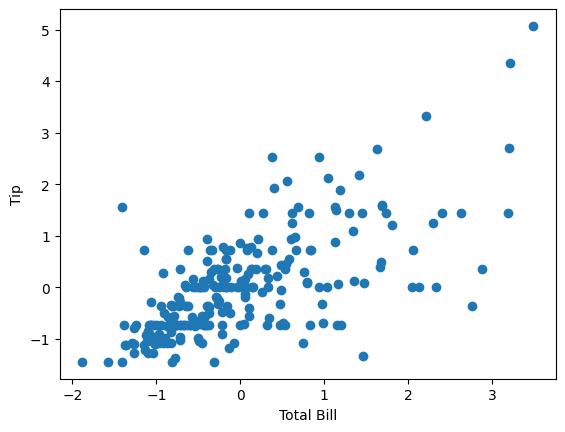

In [149]:
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

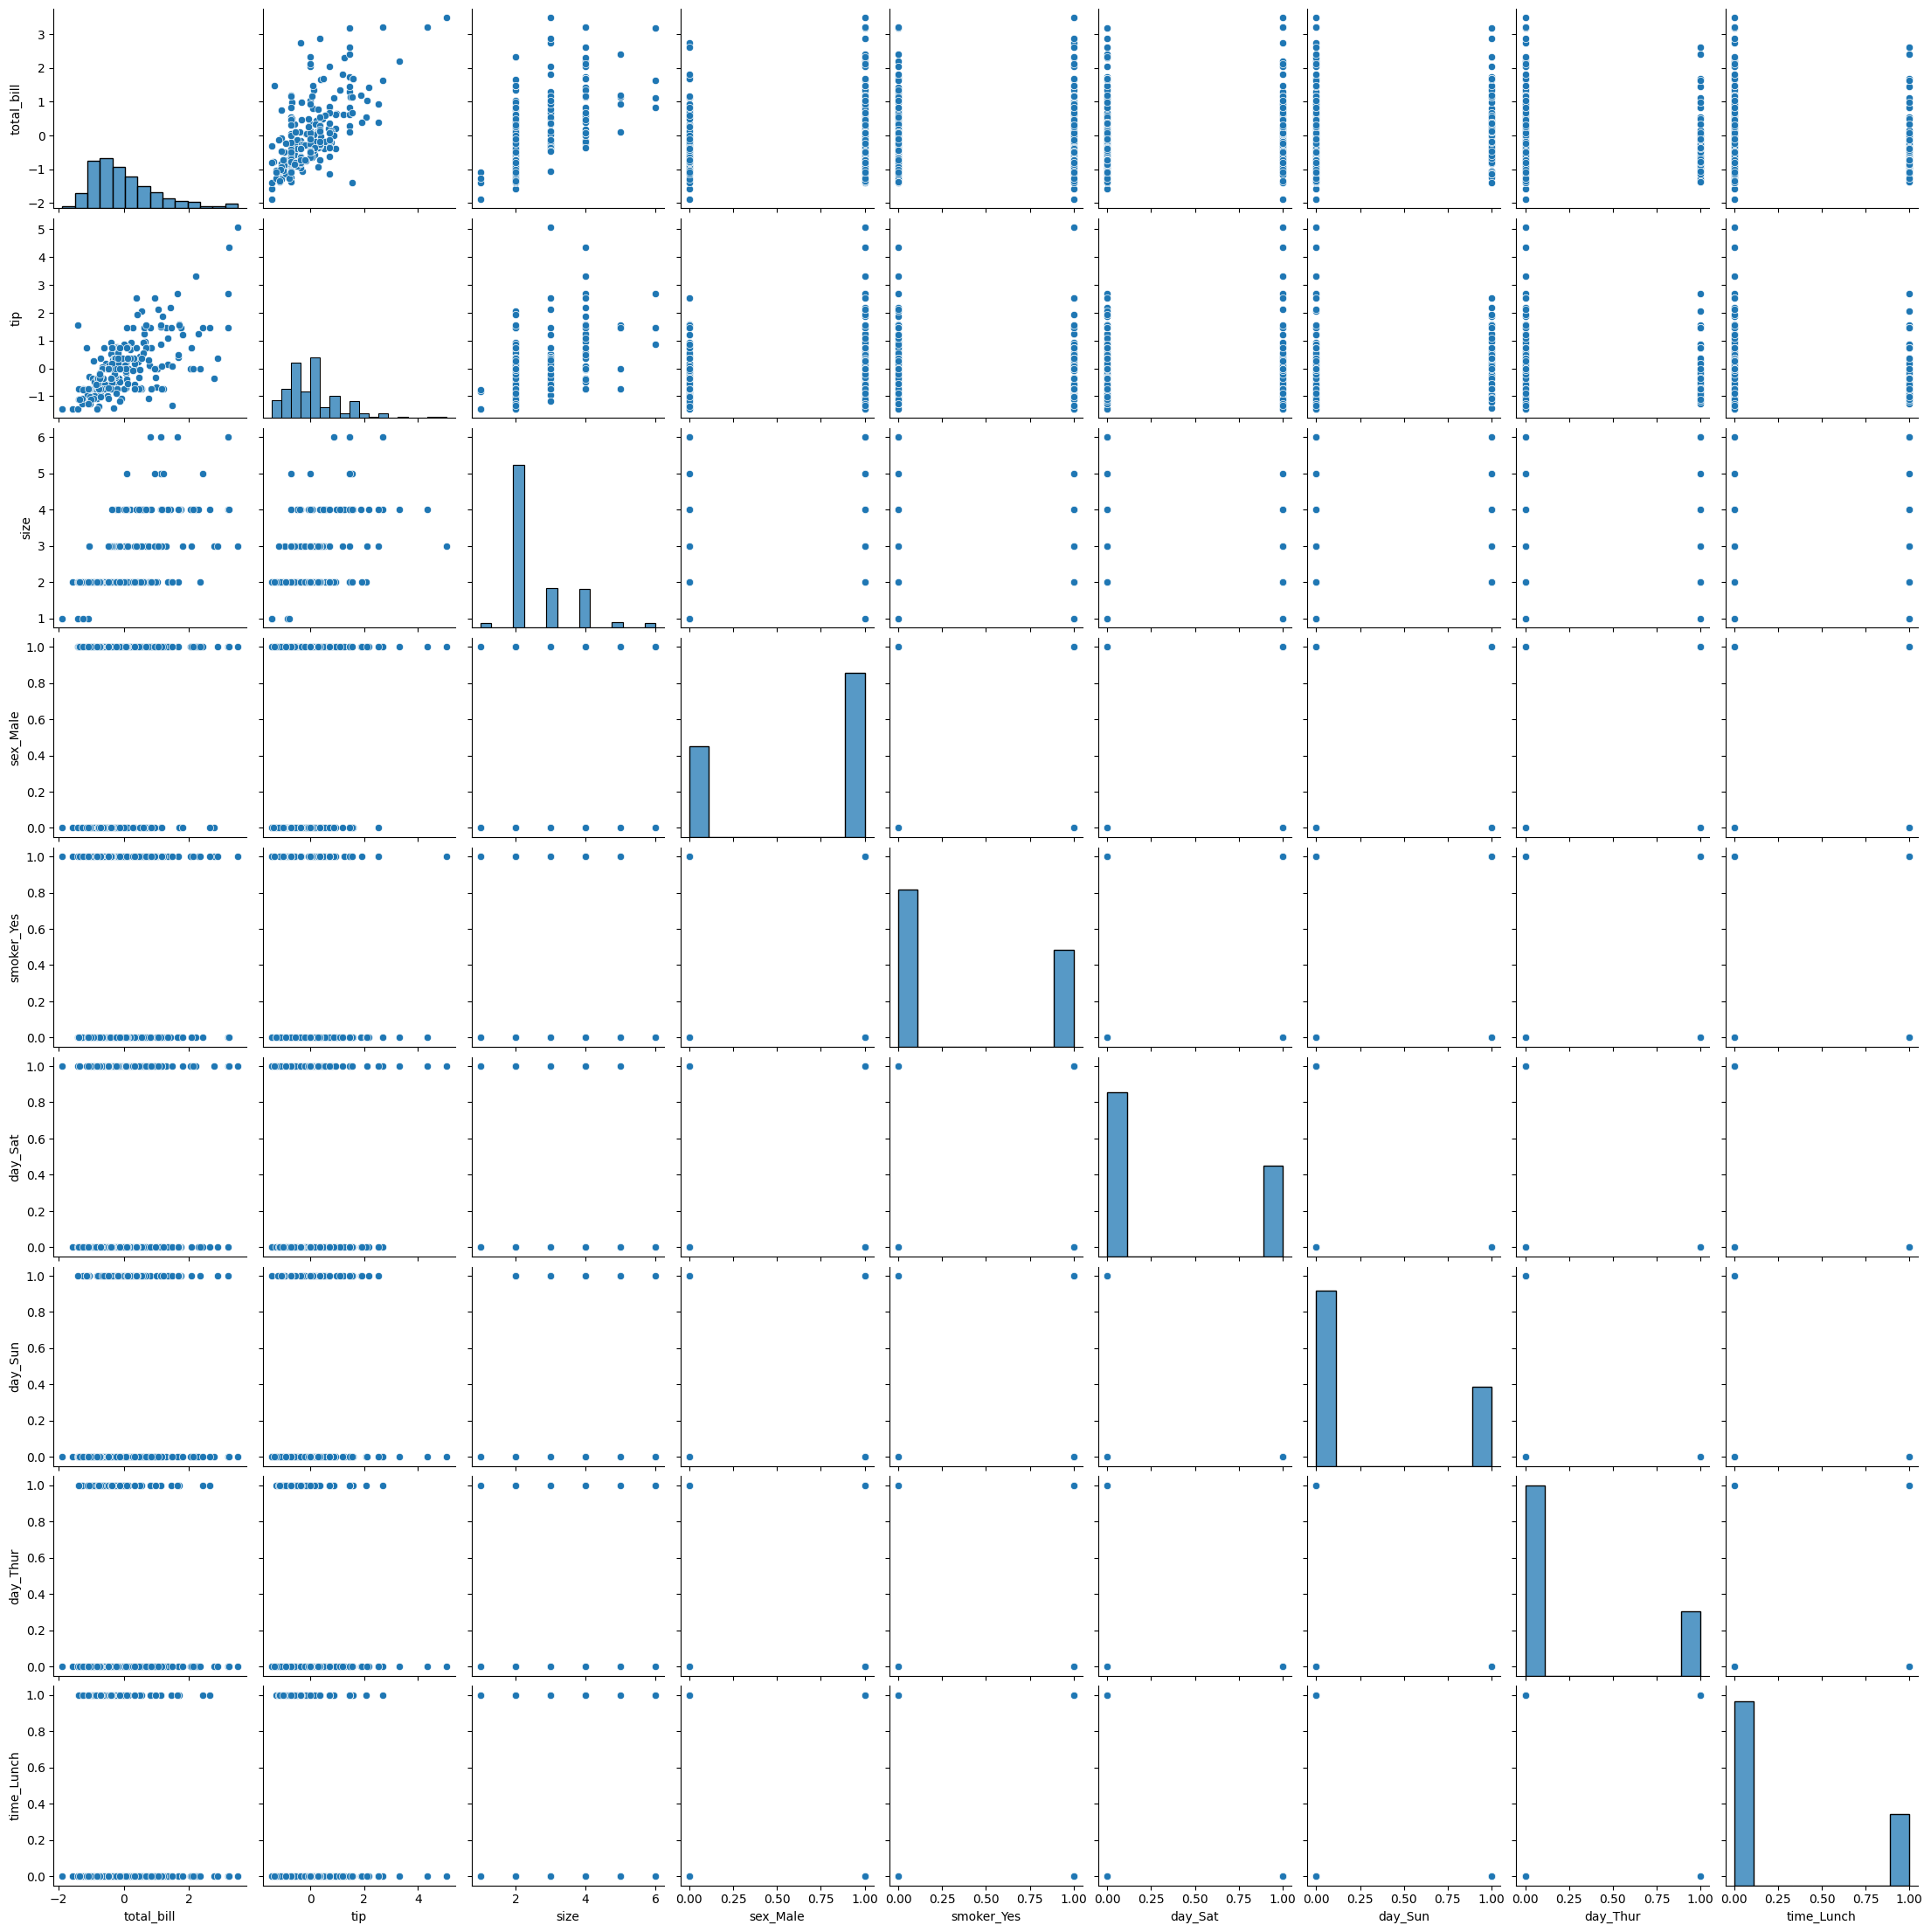

In [150]:
sns.pairplot(df)
plt.show()

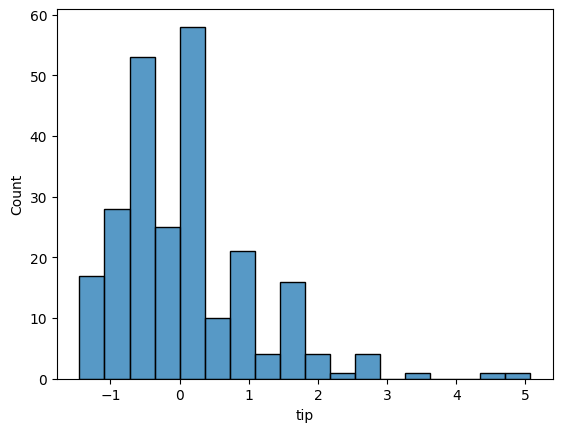

In [151]:
sns.histplot(df, x='tip')
plt.show()

The above plot clearly shows that the tip count is left skewed. So, we'll normalize the data using Yeo Johnson which is a robust normalization technique.

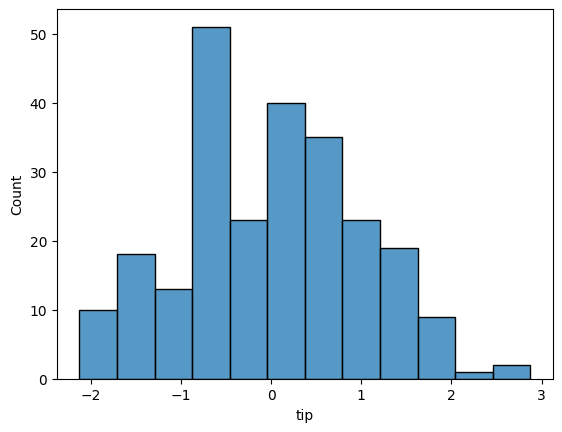

In [152]:
pt = PowerTransformer(method='yeo-johnson')
df[['tip']] = pt.fit_transform(df[['tip']])

sns.histplot(df, x='tip')
plt.show()

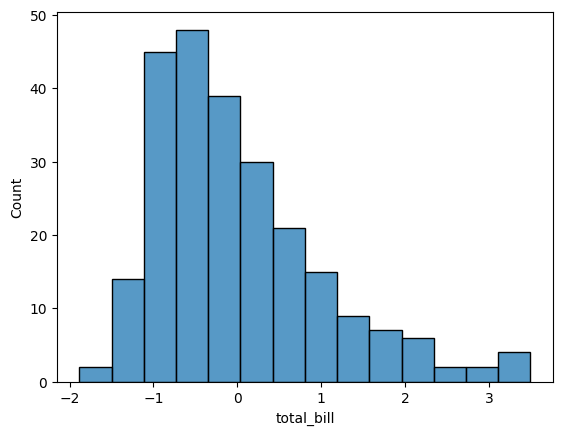

In [153]:
sns.histplot(df, x='total_bill')
plt.show()

Even the count plot of total_bill is left skewed. So, we'll use Yeo Johnson here as well

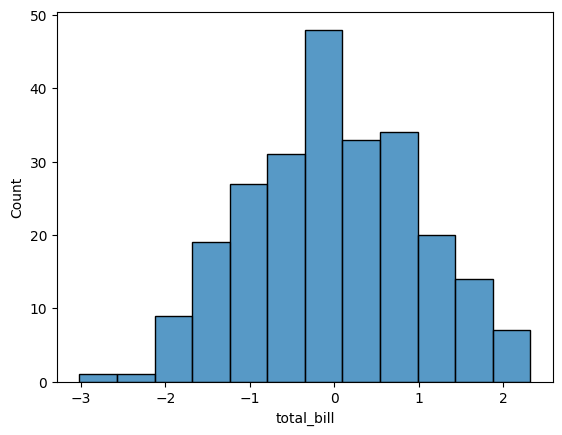

In [154]:
df[['total_bill']] = pt.fit_transform(df[['total_bill']])

sns.histplot(df, x='total_bill')
plt.show()

Now, the normalized, scaled and well encoded dataset looks like the below shown dataFrame

In [155]:
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,-0.134977,-2.109763,2,False,False,False,True,False,False
1,-1.321131,-1.182749,3,True,False,False,True,False,False
2,0.391926,0.611226,3,True,False,False,True,False,False
3,0.668593,0.483476,2,True,False,False,True,False,False
4,0.753498,0.681000,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,1.118715,1.745840,3,True,False,True,False,False,False
240,0.975186,-0.755757,2,False,True,True,False,False,False
241,0.569212,-0.755757,2,True,True,True,False,False,False
242,-0.013803,-1.065753,2,True,False,True,False,False,False


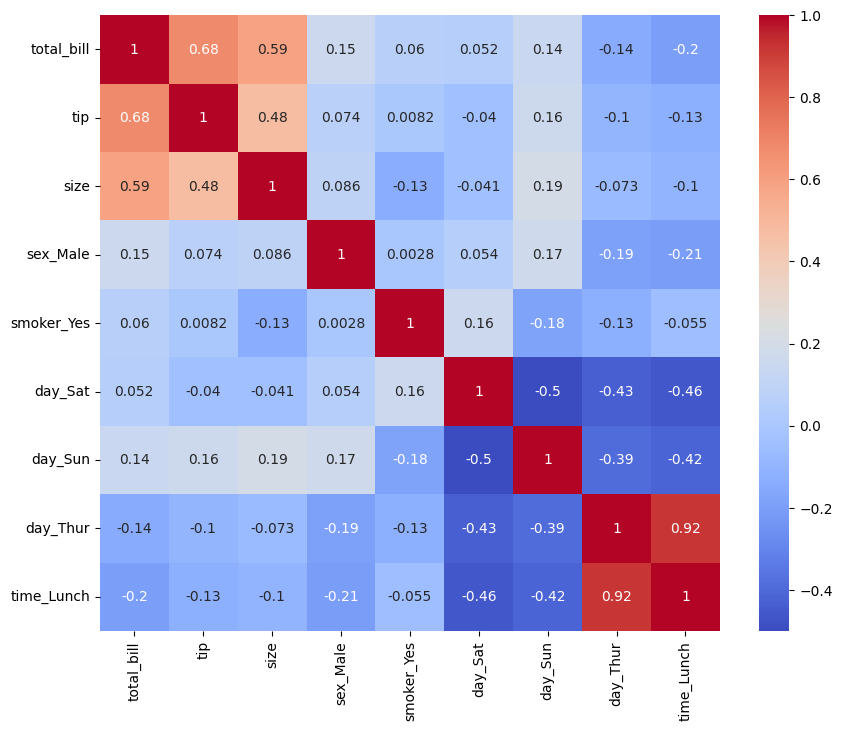

In [156]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Here, I've split the dataset into training and testing data.


In [157]:
X = df.drop(columns=['tip'])
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 195
Test set size: 49


Now, using mutual info regressor, I have checked the features which contribute the most to deciding the tip value.

            Mutual Information
total_bill            0.320669
size                  0.111356
day_Sun               0.054186
time_Lunch            0.051442
sex_Male              0.033953
smoker_Yes            0.027538
day_Sat               0.000000
day_Thur              0.000000


<ipython-input-158-6dc9a68b3c36>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_info_df.index, y=mutual_info_df["Mutual Information"], palette='viridis')


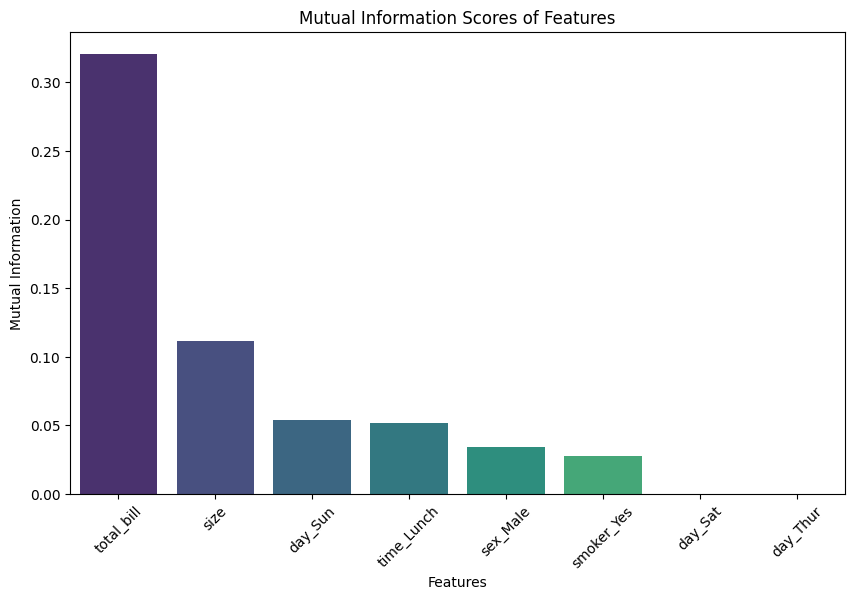

In [158]:

mutual_info = mutual_info_regression(X, y)

mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=["Mutual Information"])
mutual_info_df = mutual_info_df.sort_values(by="Mutual Information", ascending=False)

print(mutual_info_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info_df.index, y=mutual_info_df["Mutual Information"], palette='viridis')
plt.title('Mutual Information Scores of Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45)
plt.show()

From, the above plot we can conclude that the total_bill is the most important feature which contributes to the tip value. Since, the params "smoker_yes", "day_Sat" and "day_Sun" have zero relation with the tip price, we can safely drop them. Although, after testing I've found that dropping these values did not change the model accuracy at all.

In [159]:
X = df.drop(columns=['tip','smoker_Yes','day_Sat','day_Sun'])

Now, I've carried out the rainbow test to check for linearity

In [160]:
X_train_with_const = sm.add_constant(X_train)
X_train_with_const = X_train_with_const.map(lambda x: 1 if x is True else (0 if x is False else x))

model = sm.OLS(y_train, X_train_with_const).fit()


rainbow_test = linear_rainbow(model)


print(f"Rainbow Test Statistic: {rainbow_test[0]}")
print(f"p-value: {rainbow_test[1]}")


if rainbow_test[1] < 0.05:
    print("The relationship between the features and the target is likely non-linear.")
else:
    print("The relationship between the features and the target seems to be linear.")

Rainbow Test Statistic: 1.5762452527391666
p-value: 0.01525631624062572
The relationship between the features and the target is likely non-linear.


Now, instead of writing the same code for printing MSE, RMSE and the R-square value over and again, I've formulated a function which does the work. It takes in a single parameter, i.e. model which signifies the regression technique currently in use. The two plots: residual plot and line plot have been included as well.

In [161]:
def evaluate_model(model):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)

    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mse)

    print("Result on Testing set: ")
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

    print("\nThe residual plot is as follows: ")

    residuals = y_train - y_pred

    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.title('Residual Plot')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    print("\nThe line plot is as follows: ")
    plt.figure(figsize=(10, 6))
    plt.plot(y_train, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Observations')
    plt.ylabel('Target Variable (Tip)')
    plt.legend()
    plt.show()


In the below code, I've simply called the function for different regression techniques. Any hyperparameter, if required is passed here itself.

Result on Testing set: 
Model: LinearRegression
Mean Squared Error: 0.5491
Root Mean Squared Error: 0.7410
R-squared: 0.4504

The residual plot is as follows: 


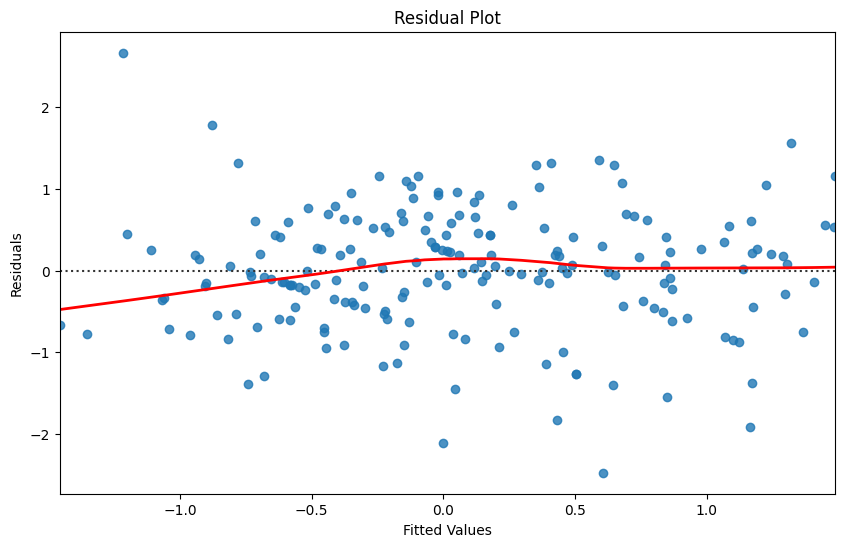


The line plot is as follows: 


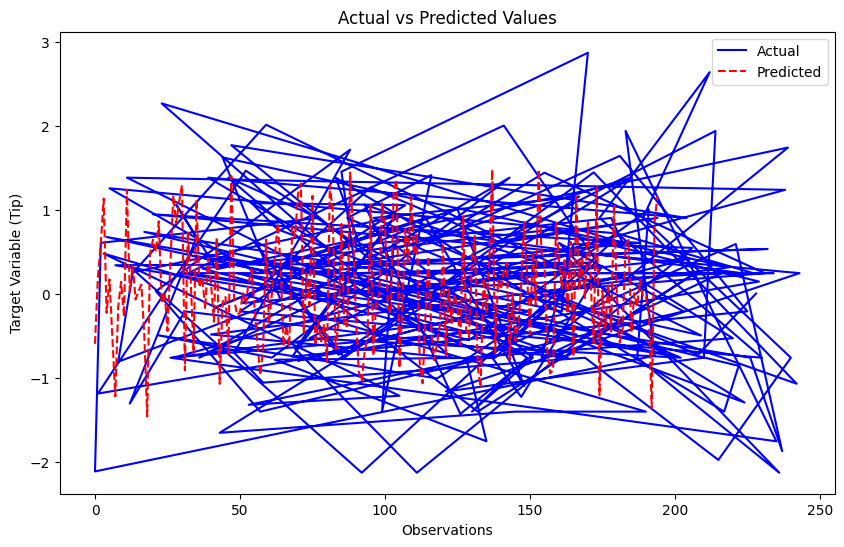

In [162]:
#Linear Regression
linear_model = LinearRegression()
evaluate_model(linear_model)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge Parameters: {'alpha': 10.0}
Result on Testing set: 
Model: Ridge
Mean Squared Error: 0.5512
Root Mean Squared Error: 0.7424
R-squared: 0.4483

The residual plot is as follows: 


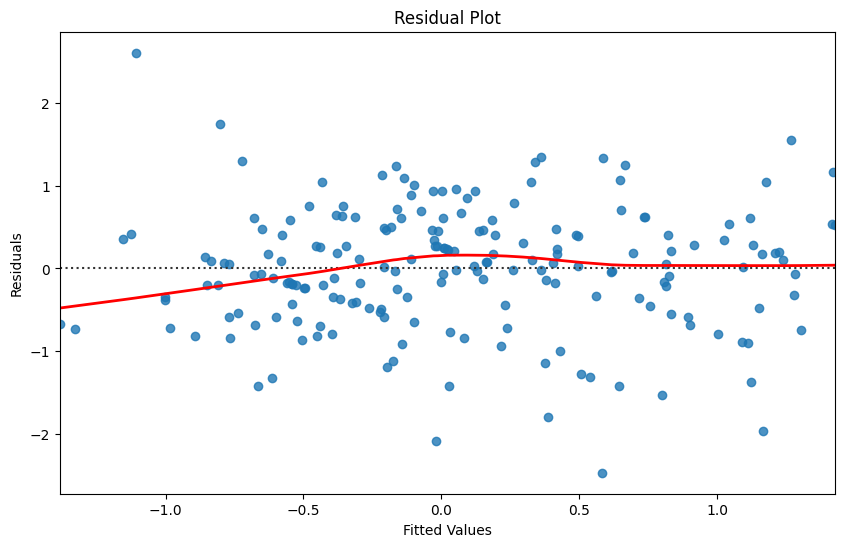


The line plot is as follows: 


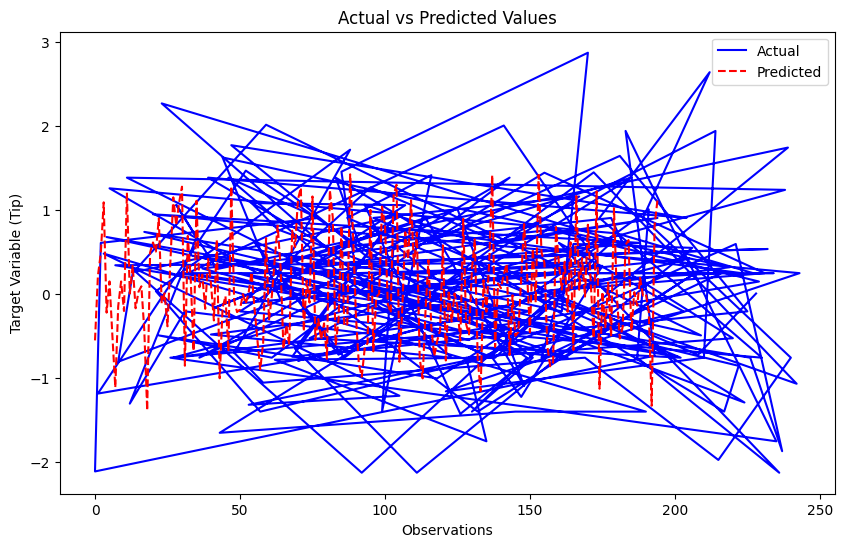

In [163]:
#Ridge Regression (L2 Regularization)
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_model = GridSearchCV(Ridge(), param_grid=ridge_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
ridge_model.fit(X_train, y_train)
print("Best Ridge Parameters:", ridge_model.best_params_)
evaluate_model(ridge_model.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Lasso Parameters: {'alpha': 0.01}
Result on Testing set: 
Model: Lasso
Mean Squared Error: 0.5518
Root Mean Squared Error: 0.7428
R-squared: 0.4477

The residual plot is as follows: 


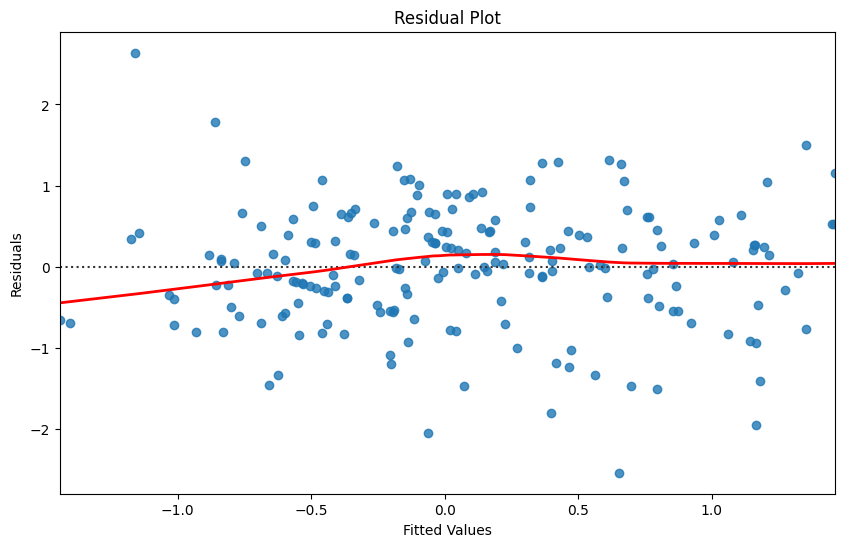


The line plot is as follows: 


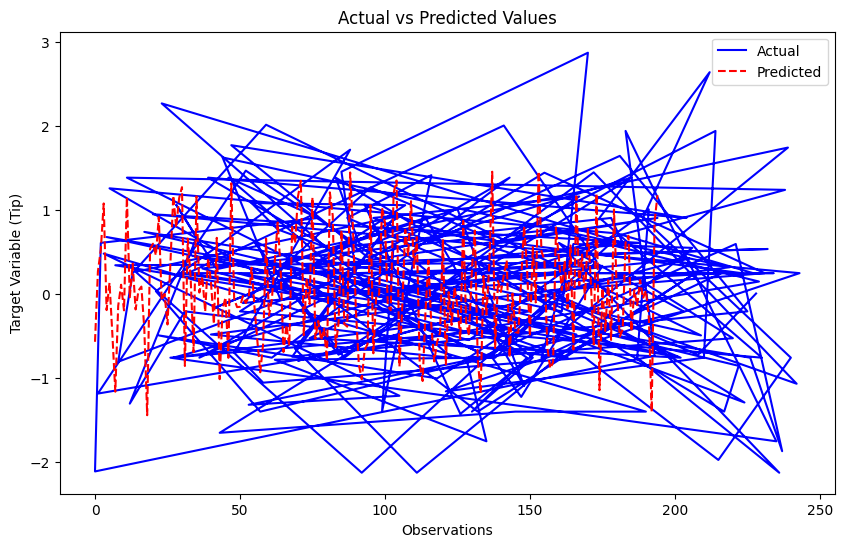

In [164]:
#Lasso Regression (L1 Regularization)
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_model = GridSearchCV(Lasso(), param_grid=lasso_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
lasso_model.fit(X_train, y_train)
print("Best Lasso Parameters:", lasso_model.best_params_)
evaluate_model(lasso_model.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Decision Tree Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Result on Testing set: 
Model: DecisionTreeRegressor
Mean Squared Error: 0.4956
Root Mean Squared Error: 0.7040
R-squared: 0.5040

The residual plot is as follows: 


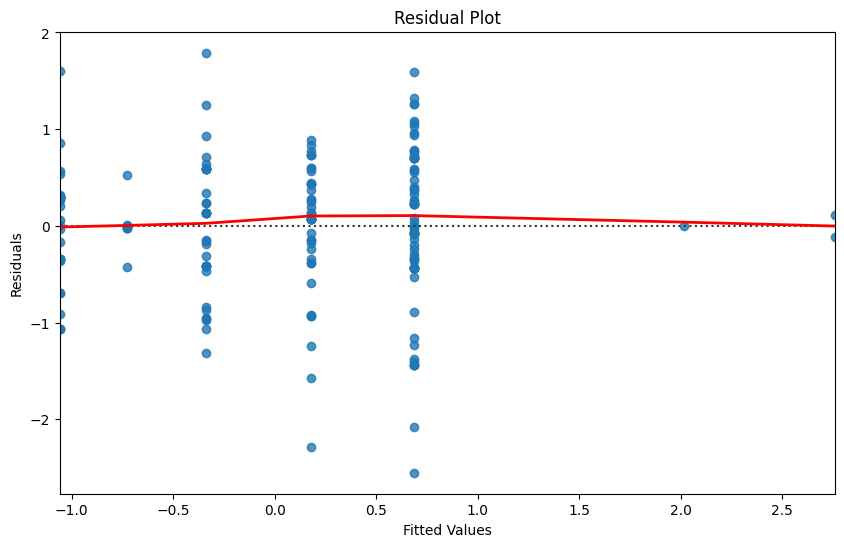


The line plot is as follows: 


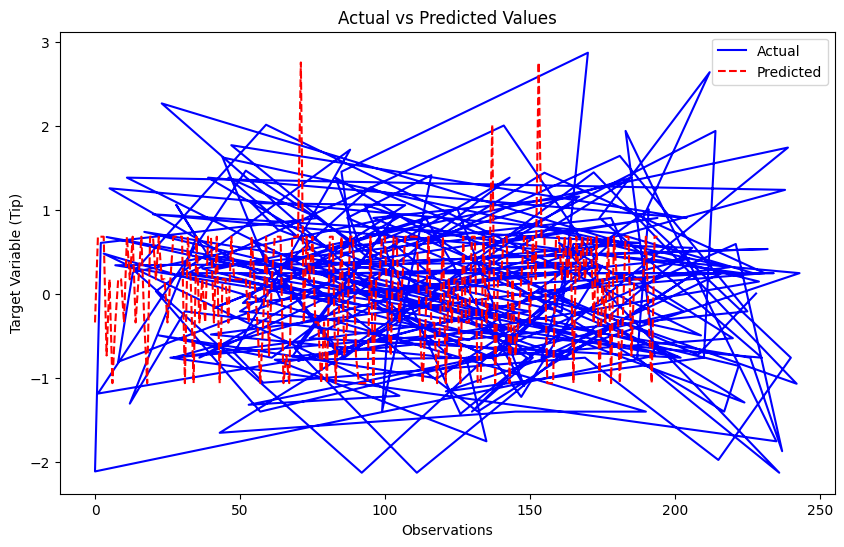

In [165]:
#Decision Tree Regression
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}
dt_model = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
dt_model.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_model.best_params_)
evaluate_model(dt_model.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Result on Testing set: 
Model: RandomForestRegressor
Mean Squared Error: 0.4442
Root Mean Squared Error: 0.6665
R-squared: 0.5554

The residual plot is as follows: 


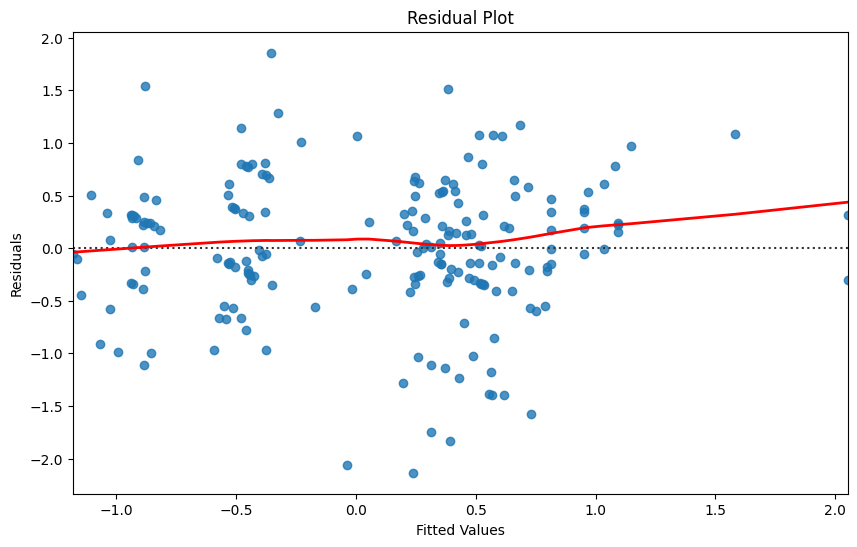


The line plot is as follows: 


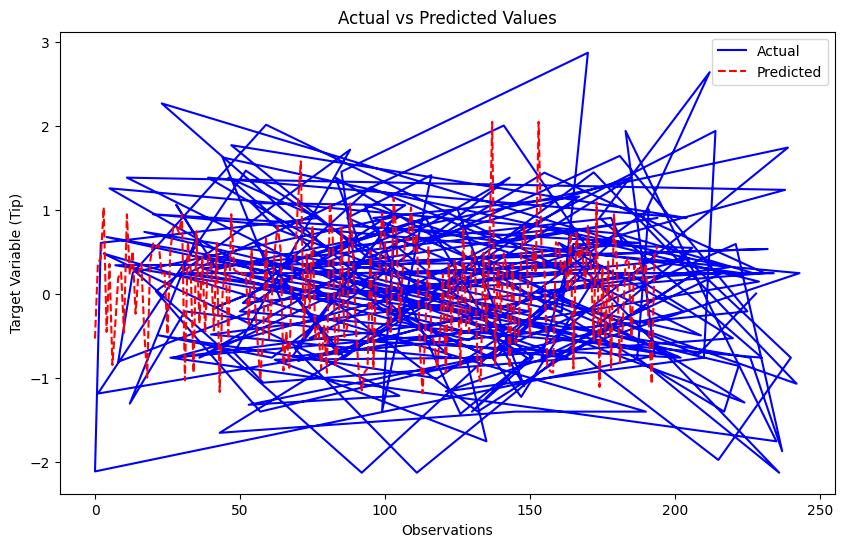

In [166]:
#Random Forest Regression
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
rf_model.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_model.best_params_)
evaluate_model(rf_model.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best SVR Parameters: {'C': 1.0, 'degree': 2, 'epsilon': 0.01, 'kernel': 'poly'}
Result on Testing set: 
Model: SVR
Mean Squared Error: 0.5188
Root Mean Squared Error: 0.7203
R-squared: 0.4808

The residual plot is as follows: 


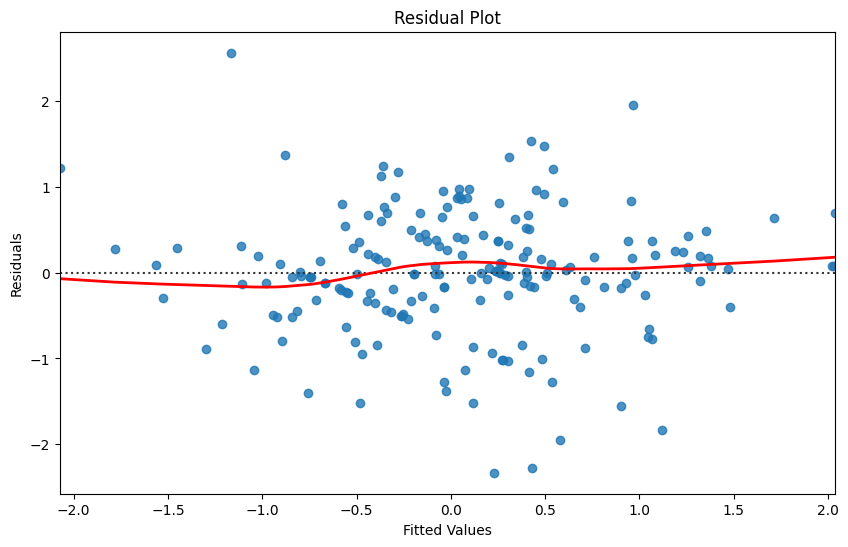


The line plot is as follows: 


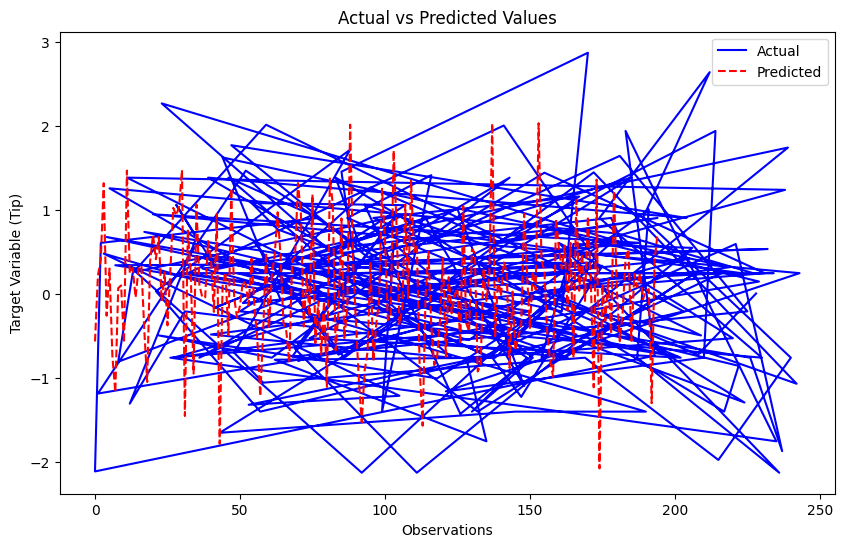

In [167]:
#Support Vector Regression (SVR)
svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 1.0],
    'degree': [2, 3, 4]  # Only for 'poly' kernel
}
svr_model = GridSearchCV(SVR(), param_grid=svr_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
svr_model.fit(X_train, y_train)
print("Best SVR Parameters:", svr_model.best_params_)
evaluate_model(svr_model.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best KNN Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Result on Testing set: 
Model: KNeighborsRegressor
Mean Squared Error: 0.5050
Root Mean Squared Error: 0.7106
R-squared: 0.4946

The residual plot is as follows: 


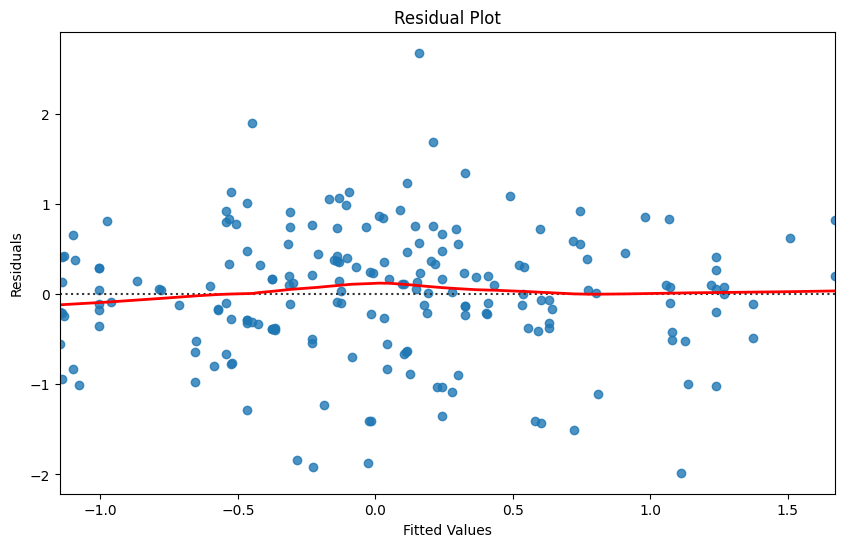


The line plot is as follows: 


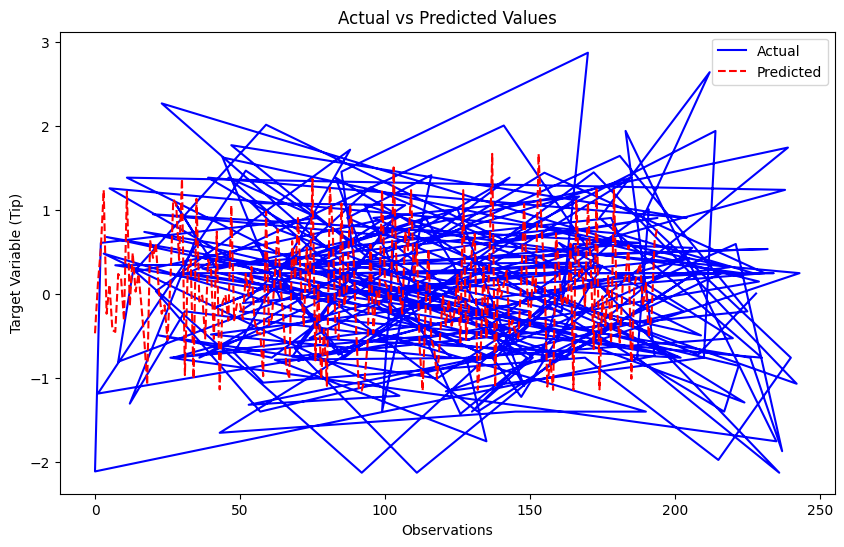

In [168]:
#K-Nearest Neighbors Regression (KNN)
knn_param_grid = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
knn_model = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
knn_model.fit(X_train, y_train)
print("Best KNN Parameters:", knn_model.best_params_)
evaluate_model(knn_model.best_estimator_)